In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import display
def all_cols(df):
    with pd.option_context('display.max_columns', None):
        return display(df)

## Monthly data

In [3]:
df_monthly = pd.read_csv(r'data/LL84_monthly/2020.csv')
df_monthly.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Electricity Use (kBtu),Natural Gas Use (kBtu)
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-20,2175731.1,Not Available
1,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Feb-20,1902208.9,Not Available
2,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Mar-20,1847793.7,Not Available
3,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Apr-20,1613573.0,Not Available
4,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,May-20,1747078.0,Not Available


In [4]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334044 entries, 0 to 334043
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Property Id              334044 non-null  int64 
 1   Property Name            334044 non-null  object
 2   Parent Property Id       334044 non-null  object
 3   Parent Property Name     334044 non-null  object
 4   Month                    334044 non-null  object
 5   Electricity Use  (kBtu)  334044 non-null  object
 6   Natural Gas Use  (kBtu)  334044 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [5]:
df_monthly['Month'] = pd.to_datetime(df_monthly['Month'], format = '%b-%y')

In [6]:
df_monthly.isna().sum()

Property Id                0
Property Name              0
Parent Property Id         0
Parent Property Name       0
Month                      0
Electricity Use  (kBtu)    0
Natural Gas Use  (kBtu)    0
dtype: int64

In [7]:
elec = df_monthly['Electricity Use  (kBtu)']
elec.value_counts()

Not Available    10960
0.0               1647
122832.0            85
136480.0            83
163776.0            82
                 ...  
94328.5              1
91429.6              1
115195.2             1
142455.2             1
41491.3              1
Name: Electricity Use  (kBtu), Length: 280898, dtype: int64

In [8]:
df_monthly[elec == 'Not Available']

,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Electricity Use (kBtu),Natural Gas Use (kBtu)
153,1160595,"STATEN ISLAND, NY-2463",Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-10-01,Not Available,30057.0
154,1160595,"STATEN ISLAND, NY-2463",Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-11-01,Not Available,88213.0
155,1160595,"STATEN ISLAND, NY-2463",Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-12-01,Not Available,159018.0
13272,2263463,P&S - Black,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-01-01,Not Available,Not Available
13273,2263463,P&S - Black,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2020-02-01,Not Available,Not Available
...,...,...,...,...,...,...,...
334039,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,2020-08-01,Not Available,Not Available
334040,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,2020-09-01,Not Available,Not Available
334041,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,2020-10-01,Not Available,Not Available
334042,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,2020-11-01,Not Available,Not Available


### drop buildings with no electricity use

In [9]:
df_monthly = df_monthly[elec != 'Not Available'].reset_index().copy()
df_monthly['Electricity Use  (kBtu)'] = df_monthly['Electricity Use  (kBtu)'].astype(float)

Seasonal electricity usage.

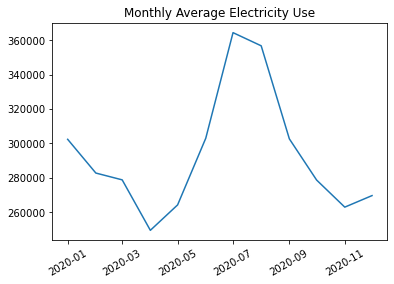

In [66]:
plt.plot(df_monthly.groupby('Month').mean()['Electricity Use  (kBtu)'])
plt.xticks(rotation = 30)
plt.title('Monthly Average Electricity Use')
plt.savefig('images/monthly_electricity_use.png')
plt.show()

In [11]:
df_monthly.columns

Index(['index', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'Month', 'Electricity Use  (kBtu)',
       'Natural Gas Use  (kBtu)'],
      dtype='object')

## Yearly Data

### Load data and initial EDA

In [12]:
df_yearly = pd.read_csv(
    'data/LL84_yearly/2020.csv', 
    na_values=['Not Available', 'Not Applicable: Standalone Property'], 
    low_memory=False
)

In [13]:
all_cols(df_yearly.head())

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PUE,Data C

In [14]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28067 entries, 0 to 28066
Columns: 250 entries, Property Id to Latitude
dtypes: float64(173), int64(9), object(68)
memory usage: 53.5+ MB


##### Columns

In [15]:
df_yearly.columns.tolist()

['Property Id',
 'Property Name',
 'Parent Property Id',
 'Parent Property Name',
 'Year Ending',
 'NYC Borough, Block and Lot (BBL)',
 'NYC Building Identification Number (BIN)',
 'Address 1',
 'City',
 'Postcode',
 'Primary Property Type - Self Selected',
 'Primary Property Type - Portfolio Manager-Calculated',
 'National Median Reference Property Type',
 'List of All Property Use Types at Property',
 'Largest Property Use Type',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Year Built',
 'Construction Status',
 'Number of Buildings',
 'Occupancy',
 'Metered Areas (Energy)',
 'Metered Areas (Water)',
 'ENERGY STAR Score',
 'National Median ENERGY STAR Score',
 'Target ENERGY STAR Score',
 'Reason(s) for No Score',
 'ENERGY STAR Certification - Year(s) Certified (Score)',
 'ENERGY STAR Certificat

### Filter to existing buildings

In [16]:
df_yearly['Construction Status'].value_counts()

Existing    28012
Test           48
Design          7
Name: Construction Status, dtype: int64

In [17]:
df_yearly.query('`Construction Status` == "Existing"', inplace=True)

### drop unneeded columns

In [18]:
missing_vals = df_yearly.isna().sum()
missing_vals[missing_vals > 20000].sort_values(ascending = False)

Barracks- Gross Floor Area (ft²)                     28012
Convention Center - Gross Floor Area (ft²)           28010
District Hot Water Use (kBtu)                        28009
Data Center - National Median PUE                    28009
Propane Use (kBtu)                                   28009
                                                     ...  
Target ENERGY STAR Score                             23152
Reason(s) for No Score                               22680
Estimated Data Flag - Fuel Oil (No. 2)               21967
2nd Largest Property Use - Gross Floor Area (ft²)    21156
2nd Largest Property Use Type                        21156
Length: 138, dtype: int64

In [19]:
df_yearly.dropna(axis = 'columns', thresh = 100).shape

(28012, 194)

In [20]:
# df_yearly['Metered Areas (Energy)'].value_counts()

In [21]:
# df_yearly['Metered Areas (Water)'].value_counts()

In [22]:
# df_yearly['Propane Use (kBtu)'].value_counts()

In [23]:
# drop_cols = [
#     'Address 1', 'National Median Reference Property Type', 'City',
#     'Construction Status', 'Propane Use (kBtu)'
# ] 
# df_yearly.drop(columns = drop_cols, inplace=True)

### Property types

In [24]:
df_yearly['Primary Property Type - Self Selected']

0                     Office
1                     Office
2           Financial Office
3                     Office
4                     Office
                ...         
28061    Multifamily Housing
28063       Worship Facility
28064       Worship Facility
28065    Multifamily Housing
28066       Worship Facility
Name: Primary Property Type - Self Selected, Length: 28012, dtype: object

In [25]:
prop_type = 'Primary Property Type - Self Selected'
df_yearly[prop_type].value_counts().head(15)

Multifamily Housing               18702
Office                             2338
K-12 School                        1614
Hotel                               552
Non-Refrigerated Warehouse          454
Manufacturing/Industrial Plant      373
Retail Store                        315
College/University                  301
Self-Storage Facility               249
Residence Hall/Dormitory            237
Mixed Use Property                  229
Worship Facility                    215
Distribution Center                 167
Parking                             159
Pre-school/Daycare                  140
Name: Primary Property Type - Self Selected, dtype: int64

In [26]:
df_yearly.query('`Primary Property Type - Self Selected` != `Primary Property Type - Portfolio Manager-Calculated`')

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,...,Number of Active IT Meters,Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,Longitude,Latitude
33,1273033,888 Seventh Ave,NaN,NaN,12/31/2020,1010280029,1024895,888 Seventh Ave,New York,10019,...,0,05/12/2021 04:54:59 PM,05/12/2021 04:55:43 PM,MANHATTAN,105.0,4.0,137.0,Midtown-Midtown South,-73.980416,40.765015
51,1418514,Kimmel,NaN,NaN,12/31/2020,1-01443-0020,1044756,351 E 68 St,New York,10065,...,0,04/05/2021 12:47:10 PM,04/05/2021 12:50:17 PM,MANHATTAN,108.0,5.0,118.0,Lenox Hill-Roosevelt Island,-73.959026,40.765740
425,1633736,X989-0201285,NaN,NaN,12/31/2020,2031060028,2012934,2007 Mapes Avenue,Bronx,10460,...,0,05/28/2021 05:13:45 PM,05/28/2021 05:29:28 PM,BRONX,206.0,17.0,371.0,East Tremont,-73.887151,40.844748
910,1836506,K808-0301558,NaN,NaN,12/31/2020,3014540054,3039123,1665 St. Marks Avenue,Brooklyn,11233,...,0,05/28/2021 05:12:08 PM,05/28/2021 05:29:28 PM,BROOKLYN,316.0,41.0,36501.0,Ocean Hill,-73.912024,40.673138
998,1836745,K997-0301717,NaN,NaN,12/31/2020,3067390077,3180747,1780 Ocean Avenue,Brooklyn,11230,...,0,05/28/2021 05:12:42 PM,05/28/2021 05:29:28 PM,BROOKLYN,314.0,48.0,538.0,Midwood,-73.955115,40.618915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,16729651,138-12 Northern Boulevard,NaN,NaN,12/31/2020,4-05010-0024,4113290,138-12 Northern Boulevard,Queens,11354,...,0,07/28/2021 02:01:23 PM,07/28/2021 02:02:21 PM,QUEENS,407.0,20.0,865.0,Flushing,-73.827652,40.764026
27750,16732050,755 Bedford Ave,NaN,NaN,12/31/2020,3017150019,3396820,755 Bedford Ave,Brooklyn,11205,...,0,07/19/2021 11:35:28 AM,07/19/2021 11:35:45 AM,BROOKLYN,303.0,33.0,1237.0,Bedford,-73.956803,40.697949
27751,16732067,765 Bedford Ave,NaN,NaN,12/31/2020,3017150014,3425028,765 Bedford Ave,Brooklyn,11205,...,0,07/26/2021 10:45:13 AM,07/26/2021 10:45:34 AM,BROOKLYN,303.0,33.0,1237.0,Bedford,-73.956757,40.697716
27752,16732069,Lester Kehoe,NaN,NaN,12/31/2020,5-01107-0055,5107089,2589 Richmond Terrace,Staten Island,10303,...,0,07/19/2021 09:50:53 AM,07/19/2021 09:52:22 AM,STATEN IS,501.0,49.0,223.0,Mariner's Harbor-Arlington-Port Ivory-Granitev...,-74.147351,40.637538


In [27]:
eui = 'Site EUI (kBtu/ft²)'
df_yearly[eui].value_counts()

0.0       59
65.4      55
63.7      49
78.8      48
75.3      48
          ..
147.3      1
189.2      1
231.6      1
142.2      1
3586.8     1
Name: Site EUI (kBtu/ft²), Length: 2439, dtype: int64

In [28]:
# df_yearly.replace({eui: {'Not Available': None}}, inplace=True)
# df_yearly.dropna(subset = [eui], inplace=True)
# df_yearly[eui] = df_yearly[eui].astype(float)

In [29]:
# df_yearly[eui].value_counts()

In [30]:
# df_yearly.loc[df_yearly[prop_type] == "Senior Care Community", eui]

In [31]:
df_yearly.loc[19073, :]

Property Id                                                       6720128
Property Name           Bronx Gardens Rehab and Nursing Center - 2175 ...
Parent Property Id                                                    NaN
Parent Property Name                                                  NaN
Year Ending                                                    12/31/2020
                                              ...                        
Council District                                                     15.0
Census Tract                                                      37504.0
NTA                                                          East Tremont
Longitude                                                      -73.890409
Latitude                                                        40.852341
Name: 19073, Length: 250, dtype: object

In [32]:
prop_gb = df_yearly[[eui, prop_type]].groupby(by = prop_type)
prop_type_table = prop_gb.agg([np.mean, len])
prop_type_table[prop_type_table[(eui, 'len')] >= 10]
prop_type_table[prop_type_table[(eui, 'len')] >= 10].sort_values(by = (eui, 'mean'), ascending= False)

Site EUI (kBtu/ft²)       
                                                                mean    len
Primary Property Type - Self Selected                                      
Senior Care Community                                    5380.879310     29
Laboratory                                                519.566667     29
Wastewater Treatment Plant                                271.842857     14
Other - Specialty Hospital                                254.414286     27
Hospital (General Medical & Surgical)                     244.719737     82
Other - Technology/Science                                236.332143     56
Supermarket/Grocery Store                                 212.270513     81
College/University                                        147.677778    301
Urgent Care/Clinic/Other Outpatient                       145.505085     61
Police Station                                            144.893333     90
Repair Services (Vehicle, Shoe, Locksmith, etc.)          134.074803    128
Other - Mall                                              132.900000     12
Residential Care Facility                                 132.090265    122
Senior Living Community                                   127.203846    108
Other - Recreation                                        126.900000     17
Fitness Center/Health Club/Gym                            125.939130     72
Medical Office                                            115.035922    112
Fire Station                                              111.926415     53
Museum                                                    111.565854     48
Other - Lodging/Residential                               109.195146    106
Wholesale Club/Supercenter                                109.015385     13
Outpatient Rehabilitation/Physical Therapy                106.570588     17
Strip Mall                                                100.426582     80
Manufacturing/Industrial Plant                            100.425723    373
Other                                                      97.164706     59
Other - Entertainment/Public Assembly                      95.066667     23
Mixed Use Property                                         91.051818    229
Financial Office                                           89.613793     29
Hotel                                                      89.589091    552
Enclosed Mall                                              87.233333     21
Social/Meeting Hall                                        86.000000     55
Retail Store                                               83.325333    315
Multifamily Housing                                        82.477602  18702
Courthouse                                                 82.096000     25
Library                                                    79.533019    109
Performing Arts                                            73.230303     70
Adult Education                                            72.553846     14
Movie Theater                                              71.710000     21
Office                                                     69.969335   2338
Automobile Dealership                                      69.045833     24
Residence Hall/Dormitory                                   66.823858    237
Bank Branch                                                65.390000     10
K-12 School                                                61.285117   1614
Refrigerated Warehouse                                     59.794286     37
Pre-school/Daycare                                         52.197810    140
Worship Facility                                           50.754545    215
Non-Refrigerated Warehouse                                 46.288532    454
Parking                                                    45.923077    159
Distribution Center                                        43.855063    167
Self-Storage Facility                                      21.702917    249

In [33]:
ghg_total = 'Total GHG Emissions (Metric Tons CO2e)'
# df_yearly[ghg_total] = df_yearly[ghg_total].replace({'Not Available': 0}).astype(float)

In [34]:
prop_gb = df_yearly[[ghg_total, prop_type]].groupby(by = prop_type)
prop_type_table = prop_gb.agg([sum, len])
prop_type_table[prop_type_table[(ghg_total, 'len')] >= 10]
prop_type_table[prop_type_table[(ghg_total, 'len')] >= 10].sort_values(by = (ghg_total, 'sum'), ascending= False)

Total GHG Emissions (Metric Tons CO2e)  \
                                                                                    sum   
Primary Property Type - Self Selected                                                     
Multifamily Housing                                                           9616037.2   
Senior Care Community                                                         4282207.6   
Office                                                                        2909336.4   
Hospital (General Medical & Surgical)                                          859730.0   
K-12 School                                                                    719067.5   
College/University                                                             650218.8   
Hotel                                                                          450306.5   
Mixed Use Property                                                             298188.5   
Manufacturing/Industrial Plant                                                 258176.7   
Wastewater Treatment Plant                                                     215267.8   
Other - Specialty Hospital                                                     211056.5   
Laboratory                                                                     196671.6   
Financial Office                                                               174831.1   
Retail Store                                                                   147284.0   
Senior Living Community                                                        103413.7   
Non-Refrigerated Warehouse                                                     101543.8   
Other - Technology/Science                                                     101522.9   
Medical Office                                                                  97381.7   
Other                                                                           92699.3   
Repair Services (Vehicle, Shoe, Locksmith, etc.)                                88530.2   
Residential Care Facility                                                       78770.5   
Residence Hall/Dormitory                                                        74592.1   
Supermarket/Grocery Store                                                       61078.2   
Museum                                                                          60111.3   
Enclosed Mall                                                                   56192.0   
Urgent Care/Clinic/Other Outpatient                                             52726.9   
Distribution Center                                                             48185.6   
Police Station                                                                  44016.1   
Courthouse                                                                      42367.9   
Strip Mall                                                                      40962.1   
Performing Arts                                                                 39678.8   
Other - Lodging/Residential                                                     39496.3   
Self-Storage Facility                                                           34785.6   
Worship Facility                                                                32601.5   
Fitness Center/Health Club/Gym                                                  25926.8   
Library                                                                         20279.2   
Other - Entertainment/Public Assembly                                           17462.8   
Parking                                                                         16802.0   
Pre-school/Daycare                                                              15045.2   
Social/Meeting Hall                                                             14237.4   
Outpatient Rehabilitation/Physical Therapy                                      12253.6   
Wholesale Club/Supercenter                   

In [35]:
steam = 'District Steam Use (kBtu)'
df_yearly[steam].dropna().sort_values()
# df_yearly[steam].replace({'Not Available': 0}).astype(float).sort_values(ascending=False)

6       -6.001336e+08
5       -4.039800e+08
24871   -4.462630e+04
17062    0.000000e+00
9875     0.000000e+00
             ...     
7997     2.723932e+08
1138     3.182731e+08
25159    4.061576e+08
27896    9.824232e+08
19073    6.381930e+10
Name: District Steam Use (kBtu), Length: 1338, dtype: float64

In [68]:
df_yearly[steam].max()

63819296900.0

In [36]:
# New York Presbyterian Hospitals
df_yearly[df_yearly['Property Name'].str.startswith('NYP ')]

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,...,Number of Active IT Meters,Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,Longitude,Latitude
5,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),12/31/2020,1-02138-0040; 1-02138-0030; 1-02139-0001; 1-02...,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,New York,10032,...,0,04/20/2021 02:47:36 PM,04/20/2021 03:06:18 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),12/31/2020,1-01480-0001; 1-01482-0040,1084781; 1084780; 1081252,525 East 68th Street,New York,10021,...,0,07/27/2021 10:59:45 AM,07/27/2021 11:01:16 AM,MANHATTAN,108.0,5.0,116.0,Lenox Hill-Roosevelt Island,-73.955251,40.764149
4027,2793804,NYP Lower Manhattan,NaN,NaN,12/31/2020,1-00100-0001,1001352,170 William St,New York,10038,...,0,04/20/2021 02:47:37 PM,04/20/2021 03:06:18 PM,MANHATTAN,101.0,1.0,1501.0,Battery Park City-Lower Manhattan,-74.005515,40.710479


In [37]:
df_yearly.iloc[5, :]

Property Id                                  28400
Property Name           NYP Columbia (West Campus)
Parent Property Id                           28400
Parent Property Name    NYP Columbia (West Campus)
Year Ending                             12/31/2020
                                   ...            
Council District                               NaN
Census Tract                                   NaN
NTA                                            NaN
Longitude                                      NaN
Latitude                                       NaN
Name: 5, Length: 250, dtype: object

In [38]:
df_yearly.iloc[6, :]

Property Id                                   28402
Property Name             NYP Cornell (East Campus)
Parent Property Id                            28402
Parent Property Name      NYP Cornell (East Campus)
Year Ending                              12/31/2020
                                   ...             
Council District                                5.0
Census Tract                                  116.0
NTA                     Lenox Hill-Roosevelt Island
Longitude                                -73.955251
Latitude                                  40.764149
Name: 6, Length: 250, dtype: object

### Drop additional columns

#### Energy Star

In [39]:
e_star = 'ENERGY STAR Certification - '
df_yearly[e_star + 'Total'] = df_yearly[e_star + 'Year(s) Certified (Score)'] \
                                .str.split(',').str.len()
df_yearly[e_star + 'Total'].fillna(0, inplace=True)
df_yearly[e_star + 'Total'].value_counts()

0.0     27575
1.0       125
2.0        62
3.0        51
4.0        37
5.0        36
7.0        34
6.0        30
8.0        25
10.0       14
9.0        12
11.0        7
18.0        1
13.0        1
14.0        1
12.0        1
Name: ENERGY STAR Certification - Total, dtype: int64

In [40]:
e_star_drop = [
    'National Median ENERGY STAR Score', # always 50,
    e_star + 'Year(s) Certified (Score)', e_star + 'Eligibility'
]
df_clean = df_yearly.drop(columns = e_star_drop)

#### Fuel use

In [41]:
fuel = 'Fuel Oil #{} Use (kBtu)'
fuel_cols = [fuel.format(n) for n in [1,2,4, '5 & 6']]
df_clean[fuel_cols]

,Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu)
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
28061,NaN,NaN,NaN,NaN
28063,NaN,NaN,NaN,NaN
28064,NaN,NaN,NaN,NaN
28065,NaN,NaN,NaN,NaN


In [42]:
df_clean[fuel_cols].notna().sum()

Fuel Oil #1 Use (kBtu)          16
Fuel Oil #2 Use (kBtu)        4717
Fuel Oil #4 Use (kBtu)        1578
Fuel Oil #5 & 6 Use (kBtu)      33
dtype: int64

In [43]:
df_clean['Fuel Oil Total'] = df_clean[fuel_cols].sum(axis = 1)

In [44]:
df_clean['Fuel Oil Total'].value_counts()

0.0           22845
276000.0         50
138000.0         44
207000.0         35
414000.0         27
              ...  
152628.0          1
1493160.0         1
44436616.6        1
4079076.8         1
2026212.4         1
Name: Fuel Oil Total, Length: 4637, dtype: int64

In [45]:
df_clean.drop(columns = fuel_cols, inplace=True)

#### Natural Gas

In [46]:
gas_kbtu = df_clean['Natural Gas Use (kBtu)'].replace({'Insufficient access': 0}).astype(float)
gas_therms = df_clean['Natural Gas Use (therms)'].replace({'Insufficient access': 0}).astype(float)

In [47]:
np.allclose(gas_kbtu/100, gas_therms, atol = 0.01, equal_nan=True)

True

In [48]:
df_clean['Natural Gas Use (kBtu)'] = df_clean['Natural Gas Use (kBtu)'].replace(
    {'Insufficient access': 0}).astype(float)
df_clean.drop(columns='Natural Gas Use (therms)', inplace = True)

#### Onsite Renewable electricity

In [49]:
onsite = 'Electricity Use – Generated from Onsite Renewable Systems '
onsite_cols = [onsite + x for x in 
                ['and Used Onsite (kWh)', 'and Used Onsite (kBtu)', 
                 '(kWh)', 'and Exported (kWh)']]
df_clean[onsite_cols].notna().sum()
df_clean[[prop_type] + onsite_cols][df_clean[onsite_cols[-1]] > 0]
# df_clean[onsite_cols].notna().sum(axis = 1) > 0

,Primary Property Type - Self Selected,Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh)
115,K-12 School,91778.2,313147.1,108764.0,16985.9
129,K-12 School,2418.5,8251.8,2504.6,86.2
194,K-12 School,135900.7,463693.2,136528.8,628.1
235,K-12 School,284183.6,969634.4,319665.0,35481.4
331,K-12 School,152108.7,518994.9,153328.4,1219.7
344,K-12 School,147180.0,502178.2,147363.6,183.6
368,K-12 School,275447.5,939826.9,574308.2,298860.7
474,K-12 School,202945.8,692451.1,503962.6,301016.8
554,K-12 School,325876.2,1111889.6,373224.6,47348.4
736,K-12 School,346635.4,1182720.0,508423.2,161787.8


In [50]:
df_clean[[prop_type] + onsite_cols][df_clean[onsite_cols[0]] > 0]

,Primary Property Type - Self Selected,Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh)
39,Retail Store,372731.0,1271758.2,372731.0,0.0
113,K-12 School,213260.5,727644.8,213260.5,0.0
115,K-12 School,91778.2,313147.1,108764.0,16985.9
129,K-12 School,2418.5,8251.8,2504.6,86.2
194,K-12 School,135900.7,463693.2,136528.8,628.1
...,...,...,...,...,...
23764,Manufacturing/Industrial Plant,62028.0,211639.5,62028.0,0.0
25319,Distribution Center,105235.6,359063.9,105235.6,0.0
26740,Multifamily Housing,274679.2,937205.4,274679.2,0.0
27153,Multifamily Housing,397579.9,1356542.6,397579.9,0.0


In [51]:
all_cols(df_clean.iloc[[26740], :])

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PUE,Data Center - National Median PUE,Distribution Center - Gross Floor Area (ft²),Enclosed Mall - Gross Floor Area (ft²),Energy/Power Station - Gross Floor Area (ft²),Financial Office - Gross Floor Area (ft²),Financial Office - Number of Computers,Financial 

In [52]:
f"{df_clean[onsite_cols[0]].sum():.3e}"

'1.613e+08'

In [53]:
f"{df_clean['Electricity Use - Grid Purchase (kWh)'].sum():.3e}"

'2.803e+10'

In [54]:
df_clean.drop(columns = onsite_cols[1], inplace= True) # remove Btu units 

#### Annual max demand

In [55]:
max_demand = 'Annual Maximum Demand '
max_demand_cols = [
    max_demand + '(kW)', max_demand + '(MM/YYYY)', 
    max_demand + '(Meter Name (Meter ID))'
]
# df_clean[max_demand + '(MM/YYYY)'][df_clean[max_demand + '(MM/YYYY)'].notna()]
df_clean[max_demand_cols].notna().sum()

Annual Maximum Demand (kW)                       1346
Annual Maximum Demand (MM/YYYY)                  1346
Annual Maximum Demand (Meter Name (Meter ID))    1345
dtype: int64

In [56]:
# This isn't enough coverage to do analysis for this feature
df_clean.drop(columns=max_demand_cols, inplace=True)

In [57]:
df_clean['Percent of Electricity that is Green Power'].mean()

0.13110004048804041

In [58]:
df_clean['Percent of RECs Retained'].value_counts()

100.0    86
0.0      10
Name: Percent of RECs Retained, dtype: int64

### Housing

We saw that housing had the largest green house gas output (by far if 
senior home outlier is removed, so let's focus on them).

In [59]:
df_housing1 = df_yearly.query('`Primary Property Type - Self Selected` == "Multifamily Housing"')

In [60]:
df_housing2 = df_yearly.query('`Primary Property Type - Portfolio Manager-Calculated` == "Multifamily Housing"')

In [61]:
df_housing = df_housing1.merge(df_housing2, how = 'outer')

C:\Users\slitv\anaconda3\envs\capstone\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


In [62]:
all_cols(df_housing)

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,National Median Reference Property Type,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Construction Status,Number of Buildings,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,National Median ENERGY STAR Score,Target ENERGY STAR Score,Reason(s) for No Score,ENERGY STAR Certification - Year(s) Certified (Score),ENERGY STAR Certification - Eligibility,ENERGY STAR Certification - Last Approval Date,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),National Median Source EUI (kBtu/ft²),Source Energy Use (kBtu),Weather Normalized Source Energy Use (kBtu),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Natural Gas Use (therms),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh),Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh),Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu),Electricity Use – Generated from Onsite Renewable Systems (kWh),Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh),Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Annual Maximum Demand (Meter Name (Meter ID)),Green Power - Onsite (kWh),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Direct GHG Emissions Intensity (kgCO2e/ft²),Indirect GHG Emissions (Metric Tons CO2e),Net Emissions (Metric Tons CO2e),Indirect GHG Emissions Intensity (kgCO2e/ft²),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite Green Power (Metric Tons CO2e),Avoided Emissions - Offsite Green Power (Metric Tons CO2e),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Percent of RECs Retained,Percent of Total Electricity Generated from Onsite Renewable Systems,LEED US Project ID,Adult Education - Gross Floor Area (ft²),Ambulatory Surgical Center - Gross Floor Area (ft²),Automobile Dealership - Gross Floor Area (ft²),Bank Branch - Gross Floor Area (ft²),Barracks- Gross Floor Area (ft²),College/University - Gross Floor Area (ft²),Convention Center - Gross Floor Area (ft²),Courthouse - Gross Floor Area (ft²),Data Center - Gross Floor Area (ft²),Data Center - UPS System Redundancy,Data Center - Cooling Equipment Redundancy,Data Center - IT Energy Configuration,Data Center - Energy Estimates Applied,Data Center - UPS Output Meter (kWh),Data Center - PDU Input Meter (kWh),Data Center - PDU Output Meter (kWh),Data Center - IT Equipment Input Meter (kWh),Data Center - IT Site Energy (kWh),Data Center - IT Source Energy (kBtu),Data Center - PUE,Data C

In [63]:
df_housing_clean = df_housing.dropna(axis = 'columns', thresh = 50)

In [64]:
df_housing_clean

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,...,Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,Longitude,Latitude,ENERGY STAR Certification - Total
0,1407884,CitySpire,NaN,NaN,12/31/2020,1-01008-7503,1076177,156 West 56th Street,New York,10019,...,04/29/2021 11:41:02 AM,04/29/2021 11:41:43 AM,MANHATTAN,105.0,4.0,137.0,Midtown-Midtown South,-73.979813,40.764538,3.0
1,1443214,River Place One,NaN,NaN,12/31/2020,1-01089-0001,1085803,640 West 42nd Street,New York,10036,...,05/28/2021 02:19:54 PM,05/28/2021 02:21:44 PM,MANHATTAN,104.0,3.0,117.0,Hudson Yards-Chelsea-Flatiron-Union Square,-73.999917,40.761487,2.0
2,1847014,1755 Broadway & 235 W 56th St,NaN,NaN,12/31/2020,1010287501,1070014,1775 Broadway & 235 W 56th St,New York,10019,...,05/20/2021 02:01:46 PM,05/20/2021 02:29:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2008836,The Visionaire,NaN,NaN,12/31/2020,1-00016-7517,1087842,70 Little West Street,New York,10004,...,06/01/2021 01:41:41 PM,06/01/2021 01:42:11 PM,MANHATTAN,101.0,1.0,31704.0,Battery Park City-Lower Manhattan,-74.016519,40.707060,0.0
4,2008956,Site 18B,NaN,NaN,12/31/2020,1-00016-0185,1086547,211NEA,New York,10282,...,05/21/2021 10:13:40 AM,05/21/2021 10:27:20 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18730,15393938,156 Beekman Street,NaN,NaN,12/31/2020,1000970010,1001331,156 Beekman Street,New York,10038,...,05/10/2021 06:01:32 PM,05/10/2021 06:02:12 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
18731,15656334,THE 203 JAY STREET CONDOMINIUM,NaN,NaN,12/31/2020,3001077501,3426023:3000183,203 JAY STREET,Brooklyn,11201,...,05/16/2021 01:14:34 AM,05/16/2021 01:14:52 AM,BROOKLYN,302.0,33.0,13.0,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,-73.986981,40.698124,0.0
18732,15692432,400 SOUTH 2ND STREET REALTIES L.P,NaN,NaN,12/31/2020,3024250016;3024250017,3063214;3063215,400 SOUTH 2ND STREET,Brooklyn,11211,...,05/06/2021 12:52:12 PM,05/06/2021 12:52:30 PM,BROOKLYN,301.0,34.0,527.0,North Side-South Side,-73.951490,40.709382,0.0
18733,16732050,755 Bedford Ave,NaN,NaN,12/31/2020,3017150019,3396820,755 Bedford Ave,Brooklyn,11205,...,07/19/2021 11:35:28 AM,07/19/2021 11:35:45 AM,BROOKLYN,303.0,33.0,1237.0,Bedford,-73.956803,40.697949,0.0


In [65]:
drop_cols = [
    'National Median Reference Property Type', 'Construction Status',
    'National Median ENERGY STAR Score'
]